Рассмотрим такие возможные проблемы:
1. AIR_SYSTEM_DELAY: проблемы во всей системе (навигация в аэропортах, перегруженность, резкое изменение климата в регионе)
2. AIRLINE_DELAY and LATE_AIRCRAFT_DELAY: проблемы авиакомпании с самолетом и с вылетом в назначенное время (вследствие чего возникает задержка прилета), эта задержка может появиться еще 
3. Задержки, связанные с конкретным днем недели. Возникают из-за того, что люди летят на работу/отдых, аэропорты перегружаются.
4. Связь с месяцем, опять же перегруз в туристическое время, например
5. Связь с локацией: из-за нестабильного климата возникают задержки

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('flights.csv', low_memory=False)
df = df.loc[(df.ORIGIN_AIRPORT.apply(len) == 3) &
            (df.DESTINATION_AIRPORT.apply(len) == 3)]
#df.rename(columns ={'ORIGIN_AIRPORT' : 'AIRPORT_CODE'})
#df.rename(columns ={'AIRLINE': 'AIRLINE_CODE'})
#df_airlines = pd.read_csv('airlines.csv')
#df_airports = pd.read_csv('airports.csv')
#df_airports.rename(columns={'IATA_CODE' : 'AIRPORT_CODE'})
#df_airlines.rename(columns={'IATA_CODE' : 'AIRLINE_CODE'})
#df.merge(df_airports, on = 'AIRPORT_CODE')
#df.merge(df_airports, on = 'AIRLINE_CODE')

1.Для начала посмотрим, в каких аэропортах происходят задержки, связанные именно с проблемами в аэропорту и в целом навигационной системе

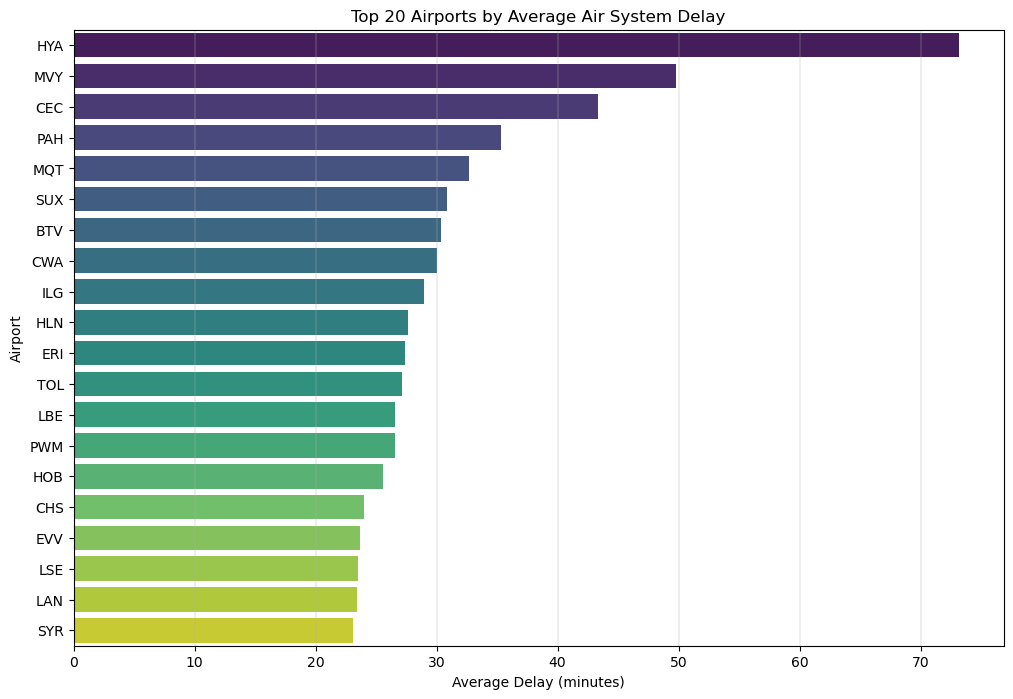

In [35]:
airport_delays = df.groupby('ORIGIN_AIRPORT')['AIR_SYSTEM_DELAY'].mean().sort_values(ascending=False).head(20)
#airport_delays = airport_delays.rename(columns={'AIRPORT': 'IATA_CODE'})
#airport_delays.merge(df_airports, on='IATA_CODE')
# Create a bar plot for the top 10 airports with the highest average air system delay
plt.figure(figsize=(12, 8))
sns.barplot(x=airport_delays.values, y=airport_delays.index, palette='viridis')
plt.title('Top 20 Airports by Average Air System Delay')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Airport')
plt.grid(axis="x", lw = 0.3)
plt.show()


Видим, что нибольшие задержки из-за проблем в аэропорту возникают в аэропорту HYA

2.Теперь посмотрим на задержки, произошедшие по вине самих авиакомпаний

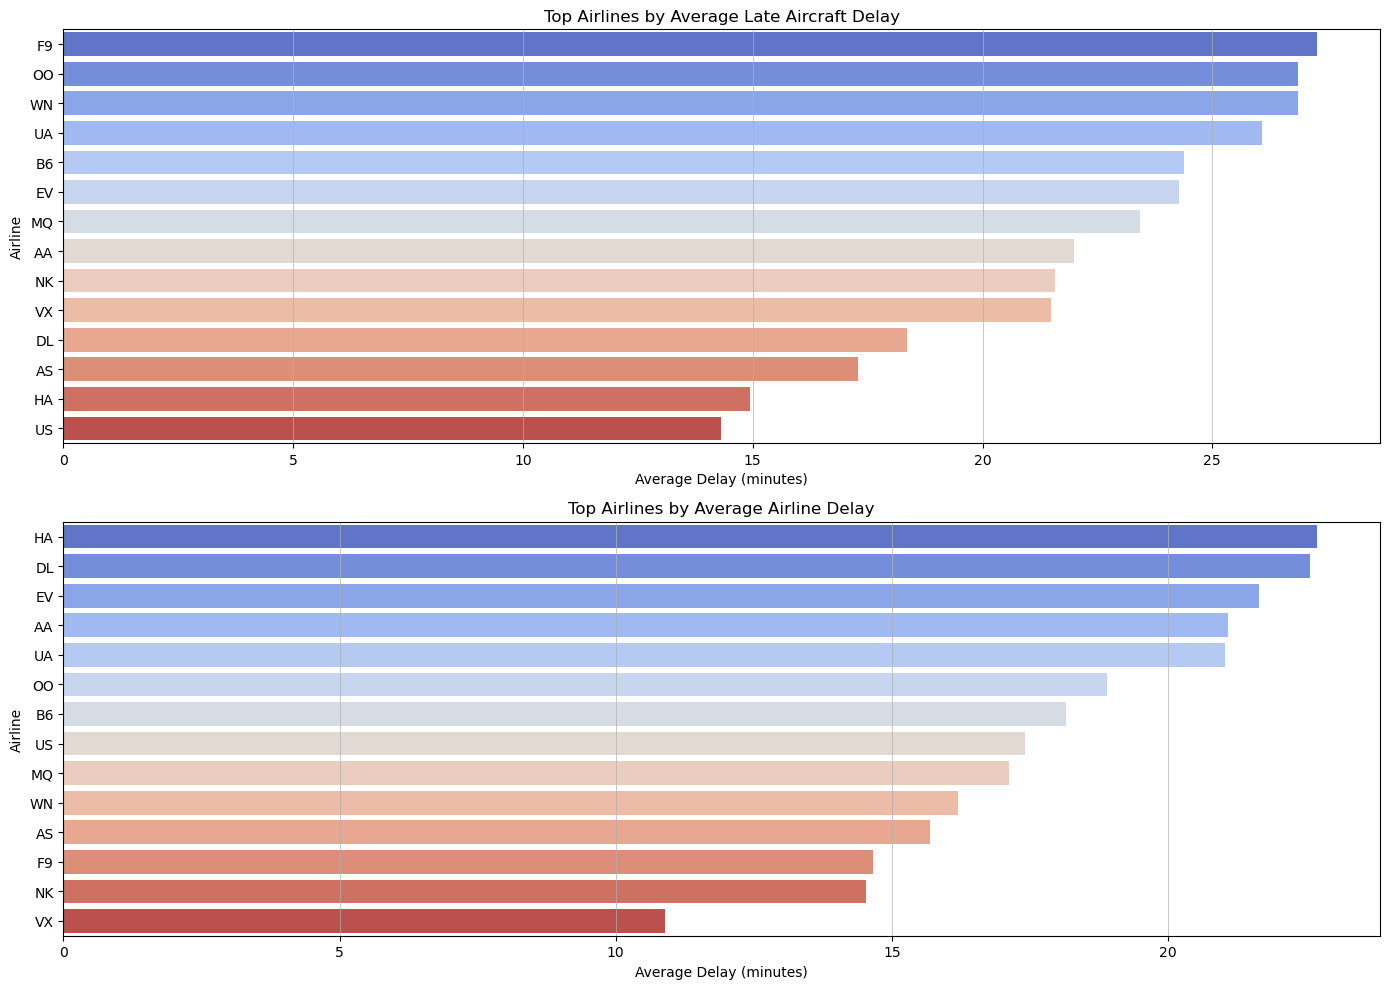

In [36]:

airline_late_delays = df.groupby('AIRLINE')['LATE_AIRCRAFT_DELAY'].mean().sort_values(ascending=False)
airline_delays = df.groupby('AIRLINE')['AIRLINE_DELAY'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
sns.barplot(x=airline_late_delays.values, y=airline_late_delays.index, palette='coolwarm')
plt.title('Top Airlines by Average Late Aircraft Delay')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Airline')
plt.grid(axis="x", lw = 0.5)

plt.subplot(2, 1, 2)
sns.barplot(x=airline_delays.values, y=airline_delays.index, palette='coolwarm')
plt.title('Top Airlines by Average Airline Delay')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Airline')
plt.grid(axis="x", lw = 0.5)
plt.tight_layout()
plt.show()


Здесь можем заметить, что чаще всего опаздывает с вылетом компании F9 и OO, и наиболее часто возникают проблемы с вылетом по техническим причинам у компаний HA и DL

3. Рассмотрим связь задержек с днем недели и поймем с чем жто  может быть связано

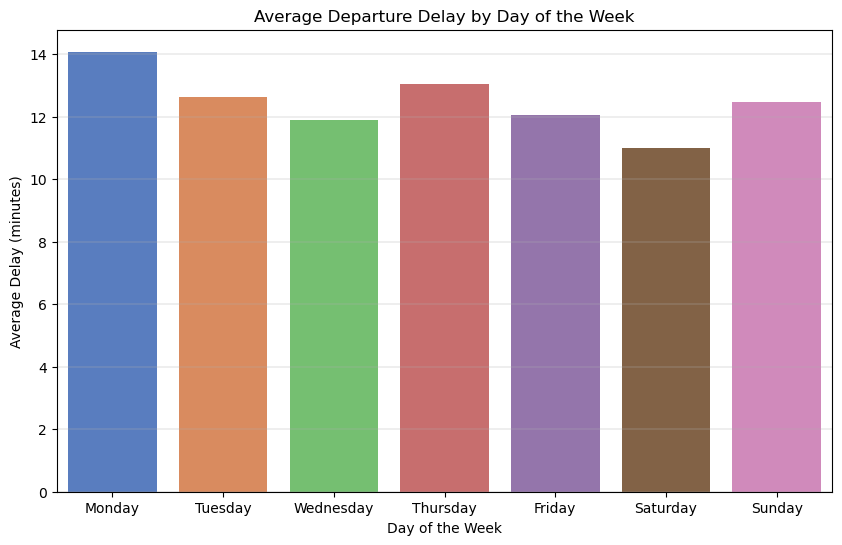

In [56]:
#Вначале обнулим все отрицательные значения, так как логичнее считать отрицательную задержку как вылет вовремя
df['DEPARTURE_DELAY'] = df['DEPARTURE_DELAY'].apply(lambda x: max(x, 0))

day_of_week_delays = df.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_delays.index, y=day_of_week_delays.values, palette='muted')
plt.title('Average Departure Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(axis="y", lw = 0.3)
plt.show()


В понедельник, хоть и ненамного, но средняя задержка была больше, проверим связь с загруженностью

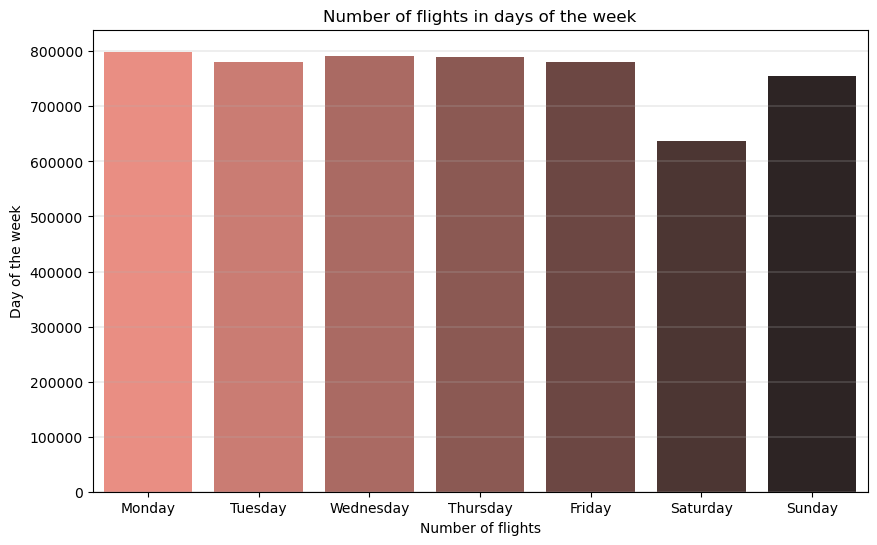

In [69]:
nflightsperday = df.groupby('DAY_OF_WEEK').apply(len)
plt.figure(figsize=(10, 6))
sns.barplot(x=nflightsperday.index, y=nflightsperday.values, palette='dark:salmon_r')
plt.title('Number of flights in days of the week')
plt.xlabel('Number of flights')
plt.ylabel('Day of the week')
plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(axis="y", lw = 0.3)
plt.show()

Загруженность была не сильно выше, чем в другие дни, но все-таки и средняя задержка не сильно выше, из чего можно сделать вывод о некоторой связи с загруженностью

4. Теперь рассмотрим средние задержки в конкретных месяцах

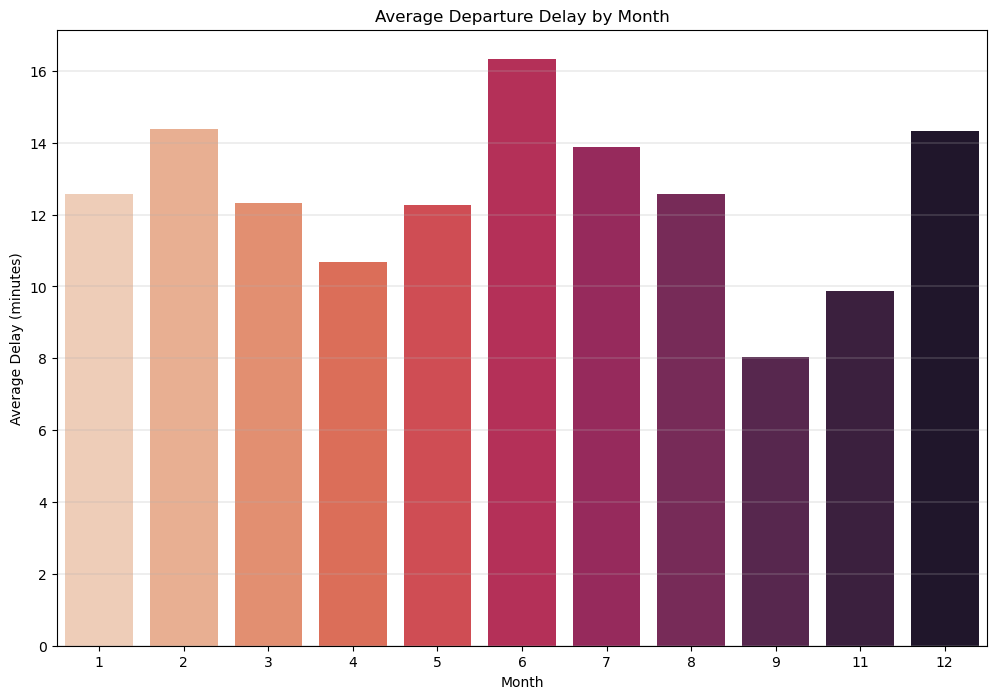

In [67]:
monthly_delays = df.groupby('MONTH')['DEPARTURE_DELAY'].mean()

plt.figure(figsize=(12, 8))
sns.barplot(x=monthly_delays.index, y=monthly_delays.values, palette='rocket_r')

plt.title('Average Departure Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.grid(axis="y", lw = 0.3)
plt.show()

Проверим, связано ли большое количество задержек в июне с загруженностью аэропортов (вероятно в связи с приездом туристов)

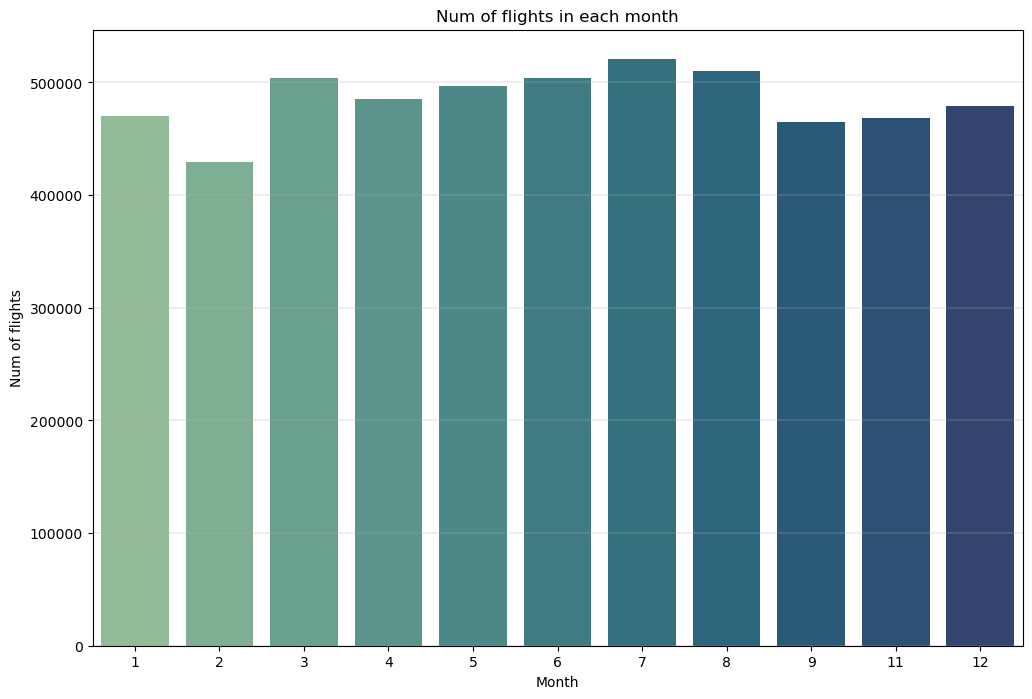

In [66]:
nflights = df.groupby('MONTH').size()
plt.figure(figsize=(12, 8))
sns.barplot(x=nflights.index, y=nflights.values, palette='crest')
plt.title('Num of flights in each month')
plt.xlabel('Month')
plt.ylabel('Num of flights')
plt.grid(axis="y", lw = 0.3)
plt.show()

Загрузка была не самой большой, поэтому она причиной не является. Теперь проверим связь с погодными условиями

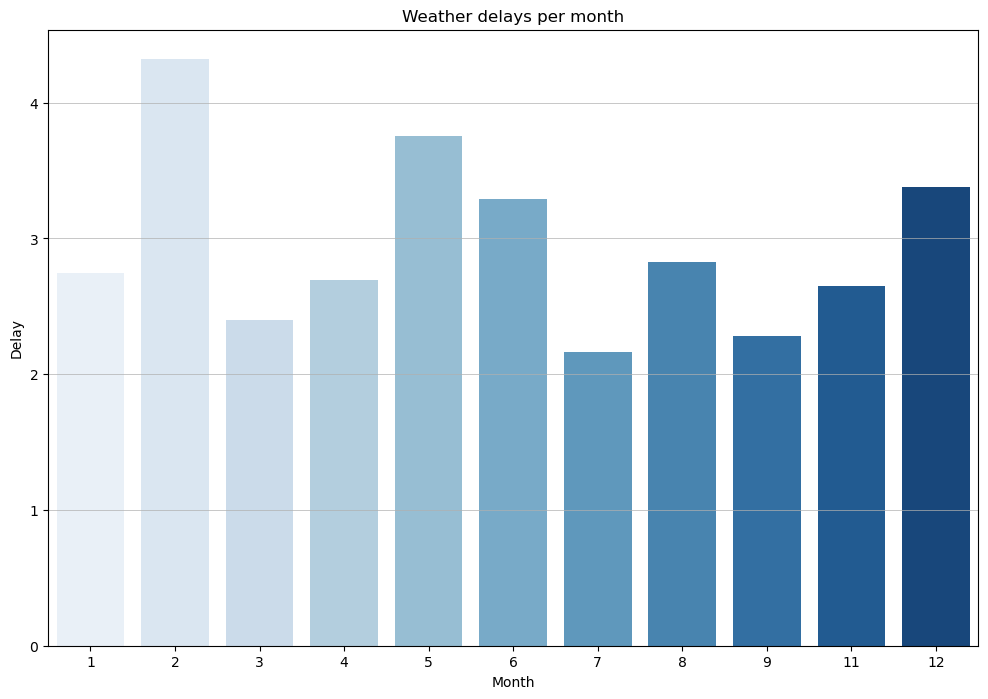

In [61]:
weather_delays = df.groupby('MONTH')['WEATHER_DELAY'].mean()

plt.figure(figsize=(12, 8))
sns.barplot(x=weather_delays.index, y=weather_delays.values, palette='Blues')
plt.title('Weather delays per month')
plt.xlabel('Month')
plt.ylabel('Delay')
plt.grid(axis="y", lw = 0.5)
plt.show()

Заметим, что в июле задержки из-за погодных условий не были основополагающим фактором. Посмотрим, почему же все-таки это происходило

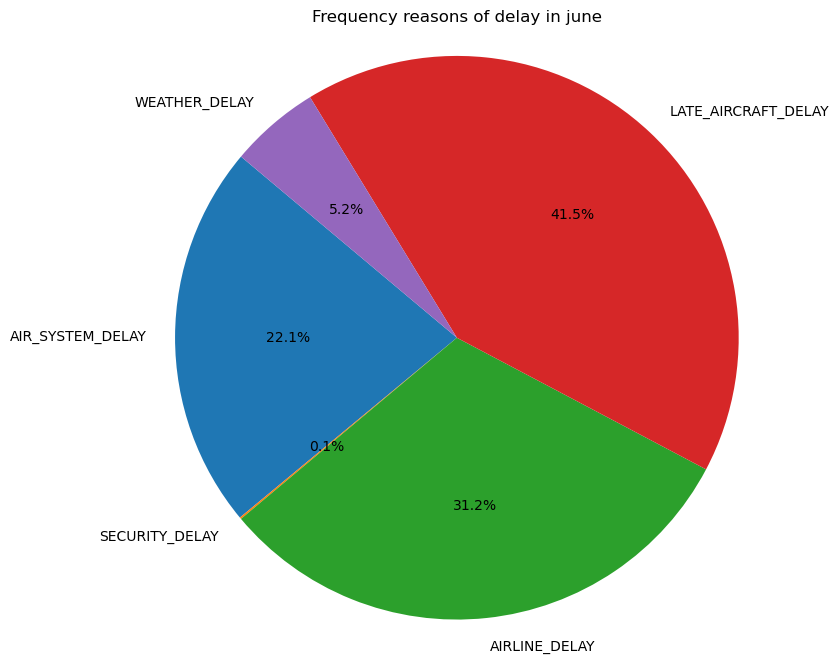

In [62]:
delay_reasons = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
june_df = df.loc[df.MONTH == 6]
frequency = june_df.loc[:, delay_reasons].sum()
plt.figure(figsize=(8, 8))
plt.pie(frequency, labels=delay_reasons, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Frequency reasons of delay in june')
plt.show()

Можем видеть, что задержки возникали из-за авиакомпаний в подавляющем большинстве

5. Рассмотрим, в каких аэропортах наибольшая задержка по причине погодных условий

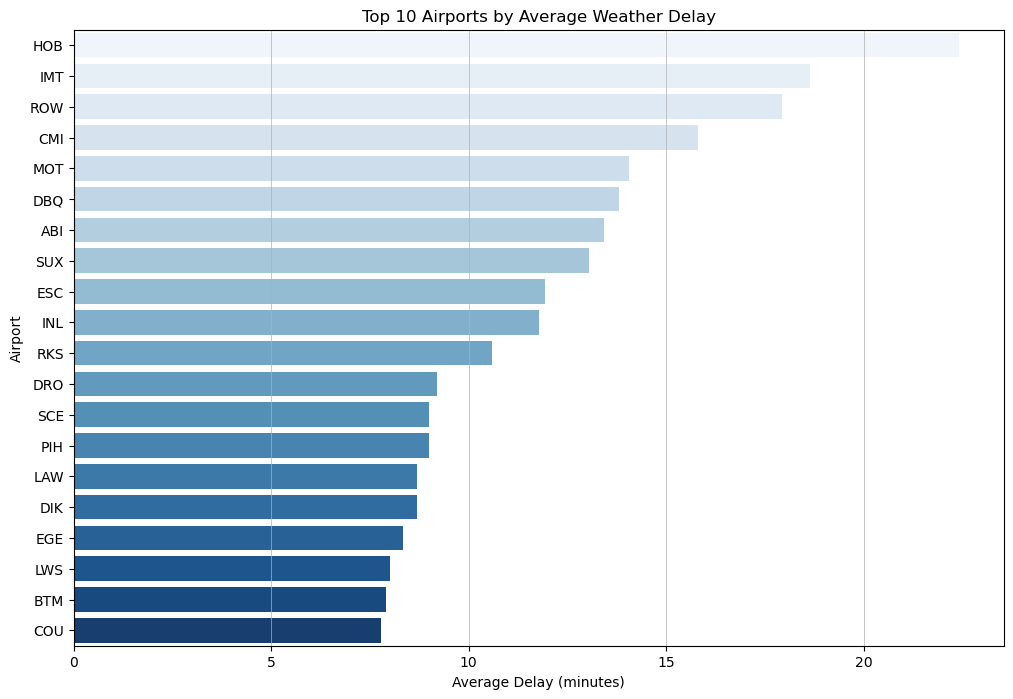

In [63]:
weather_delays = df.groupby('ORIGIN_AIRPORT')['WEATHER_DELAY'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=weather_delays.values, y=weather_delays.index, palette='Blues')
plt.title('Top 10 Airports by Average Weather Delay')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Airport')
plt.grid(axis="x", lw = 0.5)
plt.show()


Видим, что в аэропорту HOB наибольшая средняя задержка из-за погодных условий, причем этот аэропорт располагается в Нью-Мексико. Я погуглил и вроде как там мог быть торнадо, и так как этот аэропорт небольшой (у него всего 3 взлетно-посадочных полосы), то накрыть его могло надолго.

Ну и на всякий случай решил посмотреть связь длины пути с задержкой прилета, но по картинке ниже видно, что связи тут и наблюдается

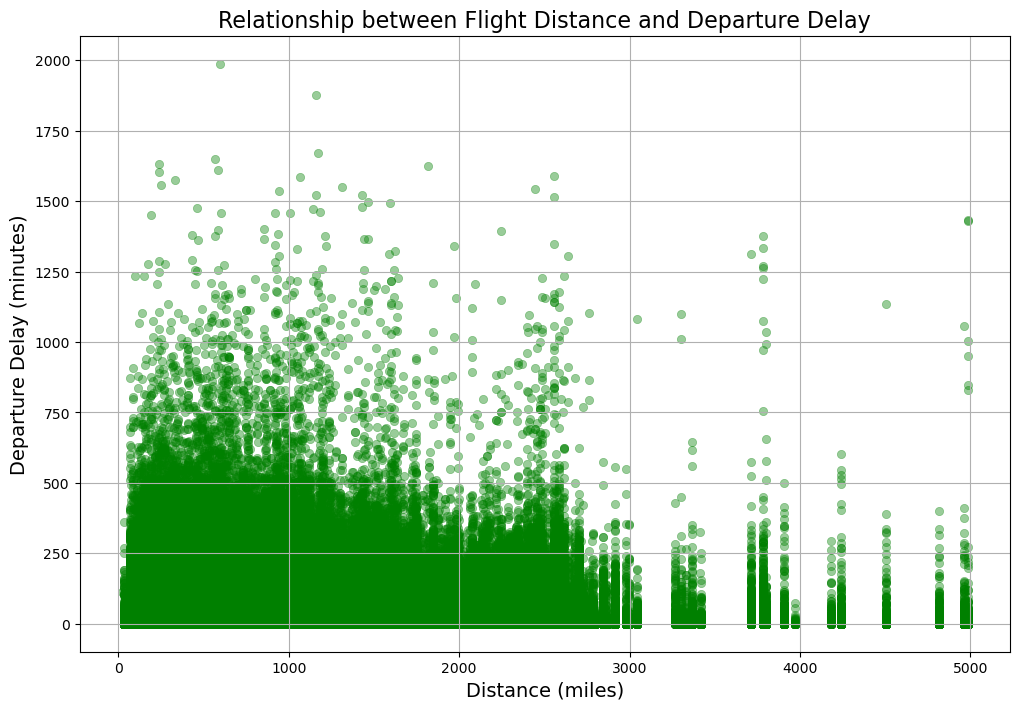

In [72]:
plt.figure(figsize=(12, 8))
subset_data = df.sample(n=1000, random_state=42)
sns.scatterplot(x='DISTANCE', y='DEPARTURE_DELAY', data=df, alpha=0.4, edgecolor=None, color='green')
plt.title('Relationship between Flight Distance and Departure Delay', fontsize=16)
plt.xlabel('Distance (miles)', fontsize=14)
plt.ylabel('Departure Delay (minutes)', fontsize=14)
plt.grid(True)
plt.show()


Итого: данный датасет, как и ожидалось, довольно сбалансированный (основан на реальных данных), поэтому какие-то серьезные проблемы не наблюдаются, только если в конкретных авиакомпаниях